# MNIST:  
- set of 780,000 small images of digits handwritten by high school students and employees of the US census Bureau. 
- labeled with the corresponding digit
- " Hello World " of machine learning
- Sklearn provides helper functions to download popular datasets, MNIST is one of them.   
    - [`sklearn.datasets.fetch_mldata`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html)
    - Fetches a dataset from `mldata.org`. 



In [1]:
# To supposrt python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures: 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Setting some default values for the plots
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images",
                       CHAPTER_ID, fig_id, ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = 'png', dpi = 300)

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', 
#                      data_home = "/Users/rishabhchopra/Desktop/handson-ml-master/my_notebooks/datasets"
                    )
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

- Datasets loaded by Sklearn generally have a similar dictionary structure: 
    - A `Col_Names` array containing the list of column names. 
    - A `Descr` key describing the dataset.
    - A `data` key containing an array with one row per instance and one column per feature. 
    - A `target` key containing an array with the labels. 

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape
# >> (70000 , 784)
y.shape
# >> (70000,) 

(70000,)

- There are 70,000 images, and each image has 784 features. 
- This is because each image is 28x28 pixels, and each feature simply represents one pixel's intensity from 0(white) to 255(black).
- This is why `feature scaling` may help later. 
- Let's have a peek at one digit from the dataset. 
    - All you need to do is grab 1 instance's feature vector, reshape it to a $ 28 \times 28$  array, and display it using Matplolib's [`imshow()`](https://matplotlib.org/users/image_tutorial.html) function. 
        - [cmap](https://matplotlib.org/users/colormaps.html): is the color scheme you want to use
        Here, it is `matplotlib.cm.binary` 
        - [Interpolation](https://matplotlib.org/users/image_tutorial.html#array-interpolation-schemes): Interpolation calculates what the color of the of a pixel "should be" according to the different mathematical schemes. 
        For example, when you resize an image, the number of pixels change but you want the same informtion. 
        Here, `"nearest" ` refers to [`nearest neightbour interpolation`](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation) 
        - The nearest neighbour algorithm selects the value of the nearest point and does not consider the values of neighboring points at all, yielding a piecewise - constant intepolant. 

FileNotFoundError: [Errno 2] No such file or directory: './images/classification/somedigitplot/.png'

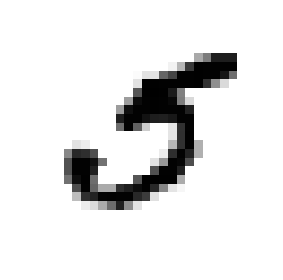

In [4]:
some_digit_image = X[36000].reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")

plt.axis("off") # No axis
save_fig("somedigitplot")

<img src="images/classification/some_digit_plot.png">

In [5]:
# Printing what the actual number is
y[36000]
# >> 5.0

5.0

- Now that you have had a quick look at the kind of data you're dealing with, you need to split the data into training and testing set. 
- The MNIST data is already split into a training set(first 60,000 images) and a test set ( the last 10,000 images):  


In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# >> Returns the training and testing sets 

- Now, you need to shuffle the training set: 
    - This will guarantee that all cross validation fold will be similar. ( You do not want one fold to be missing some digts). 
- Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. 



In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier: 

- Let's try and detect one class for now. 
    - "5 detector" will be an example of a _binary classifier_ capable of distinguishing between only 2 classes, 
        - __5__ and
        - __not 5__
        
> ### i) Create target vector for one class, for binary classification 


In [ ]:
y_train_5 = (y_train == 5) # For training binary classifier
# Returns a boolean array which is True for all 5s and
# False for all other digits. 

y_test_5 = (y_test == 5) # For testing binary classifier 
# Returns a boolean array which is True for all 5s and
# False for all other digits. 

- Okay, so now, lets pick a classifier and train it. 
- A good start is the [`Stochastic Gradient Descent`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) classifier, using Scikit Learn's [`SGDClassifier`](http://scikit-learn.org/stable/modules/sgd.html#sgd) class. 
    - Linear classifiers ( SVM, logistic regression, any other) with SGD training. 
    - The estimator implements regularized linear models with stochastic (random) gradient descent learning. 
    - The gradient of the loss is estimated for each sample at a time and model is updated along the way with a decreasing strength schedule ( aka learning rate). 
    - SGD allows minibatch( online/out-of-core) learning.
    - For best result using the default learning rate schedule, the data should have 0 mean and unit variance.  
    - This implementation works with the data represented as dense or sparse (scattered) arrays of floating point value for the features. 
    - The model it fits can be controlled by the loss parameters, by default, it fits a linear SVM. 
    - The regularizer is a penality added to the loss function that shrinks model parameters towards zero vector. 
    - This classifier has the advantage of being capable of handling very large datasets eficiently. 
    - Advantages: 
        - Eficiency, 
        - easy of implementation
    - Disadvantages: 
        - SGD required a number of hyperparameters, such as regularization parameter, and the number of iterations.
        - SGD is sensitive to feature scaling. 
        
- This is in part because SGD deals with the training instance, one at a time (which makes it well suited for _online learning_. 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
# >> Creating the classifier, setting the random_state 

sgd_clf.fit(X_train, y_train_5)
# > fitting the training set to the classifier 

__TIP:__ The `SGDClassifier` relies on randomness durin training (hence the name "stochastic"). If you want reproducible results, you should set the random_state parameter. 
- Now, you can use it to detect the images of the number 5. 

In [ ]:
sgd_clf.predict([some_digit])
# >> array([True], dtype=bool) 

- The classifier guesses that the image represents a 5 ( `True`). 
- In this case, it guessed it right! Now, let's evaluate this model's performance. 


> ### ii) Performance Measures: 

- Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. 
- There are many performance measures available. 
    - __Using Cross Validation: __
        - [__`sklearn.model_selection.StratifiedKFold`__](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), see `Stratified Shuffle Split`, in code block 25 in `End-to-End`. 
            - Stratified K-folds cross validatior.
            - Provides train/test indices to split data in train/test sets. 
            - The cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
            - That is, each fold will have equal percentage of 0s, 1s, 2s, ... 9s.
        - [__`sklearn.base.clone(estimator, safe = True)`__](http://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html)
            - Constructs a new estimator with the same parameters. 
            - Clone does a deep copy of the model in an `estimator` without actually copying attached data. 
            - It yileds a new estimator with the same parameter thas has not been fit on any data. 
            - Parameters: 
                 - estimator: estimator/group of estimators to be cloned. 
                 - safe: boolean, optional: If safe is false, `clone` will fall back to deep copy on objects that are not `estimators`. 
        

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Create StratifiedKFold cross validator 
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, 
                                            y_train_5):
    """
    As each interation, the code creates a clone of the
    classifier, trains the clone on the training fold, and
    makes prediction on the test fold.
    There will be 3 iteration as the number of splits is 3,
    meaning there are 3 different combinations of indices
    for the training and validation sets. 
    """
    # .split method generates the indices for training
    # and validation set, such that each set has an equal
    # proportion of labels from each class. 
    
    # Cloning the SGDClassifier
    clone_clf = clone(sgd_clf)
    
    # Splitting the data into training and validation
    # sets. 
    X_train_folds = Xtrain[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    # Fitting the training fold to the clone classifier
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # Making predictions on the test fold
    y_pred = clone_clf.predict(X_test_folds)
    
    # Checking accuracy of predictions
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))
    
    
# >> Prints 0.9502, 0.96565, 0.96495

- Let's use the `cross_val_score()` function to evaluate your `SGDClassifier` model using K-fold cross-validation, with 3-folds. 
    - This means that the training set will be divided into 3 folds, and will be trained 3 times using a different fold for the validation set, each time. 
    

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,
               X_train,
               y_train_5,
               cv = 3,
               scoring = "accuracy")

# >> [0.9502, 0.9565, 0.9495]
# These are the 3 validation scored. 

- Wow! Above 95% accuracy! ( Ratio of correct prediction over total number of predictions) 
- Before getting too excited, lets look ay a very dumb classifier that just classifies every sigle image in the "not-5" class. 
- [__`sklearn.base.BaseEstimator`__](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
    - Base (Parent) Class for all estimators in scikit-learn. 
    - All estimators should specify all the parameters that can be set the class level in their `__init__` as explicit keyword argument. i.e no $*$args or $*$kwargs.  
    - Methods:
        - `get_params()` -  Get parameters for this estimator. 
        - `set_params(**params) - Set the parameters for this estimator. 
        - __DOUBT__: Useful for hyperparameter tuning?
       

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
        # >> Will return a 0 column matrix with the rows = 
        # number of training examples and 1 column

In [ ]:
never_5_clf = Never5Classifier()
# >> Will always predict a 0 even if the image is a 5.

"""Recall, y_train_5 is 1 when image is a 5 and 0 
otherwise. """
cross_val_score(never_5_clf,
                X_train,
                y_train, 
                cv = 3,
               scoring = "accuracy")
# >> [[0.909, 0.90715, 0.912]]


- This gets an accuracy of 90% even though we were just blindly predicting an image to be a "not-5". 
- So, if you always guess that an image is _not_ a 5, you will be right about __90%__ of the time! 
- Beats [Nostradamus](https://www.indy100.com/article/nostradamus-predictions-2017-astrology-7509551)
- This demonstrates [why accuracy is generally not the preferred performance measure for classifiers](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/00b4f6bf-dcd1-4f96-9c7d-69374b03c238), especially when you are dealing with _skewed datasets_ ( i.e when some classes are much more frequent than others)   
    - Accuracy tells us, out of all the instances, how many did we correctly classify.
    - ### i.e $ \frac{TP + TN}{TP + FP + TN + FN} $
    - ### i.e $ \frac{Correctly Classified Points}{Total Points} $ 
    - Another example would be if we had a dataset which had 20,000 `non-fraud` transactions, and 400 `fraud` transactions .
        - If we use a model that always predicts a transcation to be `non- fraud`, our accuracy will be: 
            - Accuracy = 20,000/20,400 = 0.9803
            - This model is no good, even though it has a high accuracy as it does not catch the bad transactions, and the aim of the model is ofcourse, to catch the fraudulent transactions. 
        - If we use a model that always predicts a transaction to be `fraud`: 
            - Accuracy = 400/20,000 = 0.02
            - This model has a pretty low accuracy even though it catches all the fraudulent transactions. Another problem is that it is accidently catching all the `non-fraud` as `fraud`.
            
    



# [Confusion Matrix](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/2034dd12-8ffc-4753-b8f4-c6042487ea5d): 

- A much better way to evaluate the performance of a classifier is to look at a _confusion matrix_.  
- The general idea is to count the number of times instances of class A are classified as instances of class B. 
    - For example, to know the number of times the classifier confused images of 5s and 3s, you would look in the $5^{th}$ rows's $3rd$ column of the confusion matrix. 
    - To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. 
    - Don't touch the test set right now. You want to use the test set only when you have a model that you're ready to launch. 
    - Instead, you can use the [__`sklearn.model_selection.cross_val_predict()`__](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function, which generates cross validated estimates for each of the folds/input data. 
        - Just like `cross_val_score()` function, the `cross_val_pedict()` performs K-fold cross validation, but instead of returning the evaluation scores, it returns the predictions made on each test set fold. 
        - This means that you get a clean prediction for each instance in the __training set__ (_once you're done testing on all possible folds_). 
            - __"clean"__ meaning that the prediction is made by a model that never saw that data during training. 
        - In the following code, the training data will be divided into 3 folds. The data will be trained thrice, each time using a different fold for testing/validation. The predictions (for each instance) made by the trained model each time on the test/ validation fold, will be returned.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,
                                X_train,
                                y_train_5,
                                cv = 3)


Now that we have the predictions on each of the training instances, we can use the array `y_train_pred` to be passed into the [__`sklearn.metrics.confusion_matrix`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). 

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# `0`: Not 5
# `1`: 5
# Rows: label, Columns: Classification 
#                 `0`          `1`
#>> array(`0`  [[53272(TN),  1307(FP)],
#       [ `1`  1077(FN),    4344(TP)]])

- __What does this tell us? __  
- There are 53,272 instances which are predicted as `not-5`, when they were `not 5`. (__`True Negative`__)
- There are 1,307 instances which are predicted as `5`, when they were actually `not-5`. (__`False Positive`__ _(mistakenly Positive)_) 
- There are 1,077 instances which are predicted as `not-5`, when they were actually `5`. (__`False Negative`__ _(Mistakenly negative)_)
- There are 4,344 instacnes which are predicted as `5`, when they were actually `5`. (__`True Positive`__)  
    - A perfect classifer would have only true positives and and true negatives. In other words, it would have nonzero values only on its main diagonal ( top left to bottom right) like here: 
    

In [ ]:
y_train_perfect_predictions = y_train_5

In [ ]:
confusion_matrix(y_train_5, y_train_perfect_predictions)
#>> array([[54579,     0],
#        [    0,  5421]])


- Here: 
    - There are 54,579 instances which are predicted as `not-5`, when they were `not 5`. (__`True Negative`__)
    - There are 0 instances which are predicted as `5`, when they were actually `not-5`. (__`False Positive`__) 
    - There are 0 instances which are predicted as `not-5`, when they were actually `5`. (__`False Negative`__)
    - There are 5,421 instances which are predicted as `5`, when they were actually `5`. (__`True Positive`__)  

- The confusion matrix gives you a lot information, but sometimes you may prefer a more consise metric. 
- An interesting one to look at this is the __accuracy of the positive predictions__, this is called the precision(_the quality, condition, or fact of being exact and accurate, marked by or adapted for accuracy and exactness._) of the classifier.
    - It answers the question, out of the instances __`predicted`__ as positve, how many were actually positive? 
## $precision = \frac{True Positive }{True Positve + False Positive}$  

- One trivial way of making perfect precision, is to make on single positive prediction ( "This is a 5" ) and ensure that it is correct. ($ precision = 1 / 1+0 = 100\% $) 

- Precision is used with an another important metric names `recall`, also called the __sensitivity or true positve rate__
    - This answers the question, out of the instances __`labeled`__ as postive, how many were correctly predicted to be positive? 
    
## $precision = \frac{True Positive }{True Positve + False Negative}$  





### False Negatives and False Positives:  

<img src = "medical.png">

- In the above example, the worse situation is a False Negative (Mistakenly classified as negative) .
i.e Classifying a sick patient(postive) as healthy(negative).   
- The other scenario is not that bad as a healthy person would just be just have to get some tests, or in a worse situation, have some medicines he should not be having.   
- Correct! A False Positive implies sending a healthy person to get more tests. This is slightly inconvenient, but ok. A False Negative implies sending a sick person home, which can be disastrous!
- _Therefore, the aim of this model is that "I need to find all the sick people! I'm ok in classifying some healthy person as sick, but i need to find all the sick people_. " 
- Needs to be a: __High Recall Model__
- Let's talk about medical model's __precision: __
    - _Out of all the points that were predicted to be poitive, how many were actually positive?_ 
    - Precision tries to classify every point correctly. __(Jo bhi classify karunga, sahi karunga) __
    - Out of all the patients diagnosed as sick, how many were actuall sick? 
    - 1000/ 1800 = 0.56, it is not a high number as this does not need to be a __high precision__ model. 
- Now, how is the __recall__ of the medical model? 
    - _Out of all the points that were actually positve, how many did we correctly classify as positive? How many of the positive points did we manage to catch (as positive)_ ? 
    - __Jitne bhi postive points hai, unme se mai kitne pakad sakta hu__
    - Out of all the patients that were sick, how many did we correcly classifiy as sick? 
    - 1000/1200 = 0.83, which is goodas this medical model needs to be a __high recall__ model. 
    

<img src = "email.png">

- In this email example, the worse situation is a False Positive, classifying a non spam (negative) as  a spam (postive). 
- The other scenario is not that bad, as the maximum we would have to do is to delete the spam mail, if the classifer does classigy a spam mail as a non-spam. 
- _So this model says, "I don't really care whether i find all the spam email but one thing is for certain. If i say an email is spam, it better be spam "_.  
- Needs to be a : __High Precision Model __
- Let's talk about email model's __precision:__
    - _Out of all the points that were predicted to be positive, how mnay were actually positive? _
    - Out of all the emails that were classified as spam, how many were actually spam? 
    - 100/ 130 = 0.77, which is good as this model needs to be a __high precision__ model. 
- Now, how is the __recall__ of the email model? 
    - _Out of all the points that were actually positve, how many did we correctly classify as positive? How many of the positive points did we manage to catch (as positive)_?     
    - Out of the emails that were actually spam, how many were correctly predicted/classified as spam? 
    - 100/270 = 0.37, wich not high. It does not matter as this model does not need to be a __high recall model__.    

 __Precison and Recall in sklearn:__
- [__`sklearn.metrics.precision_score(y_true, y_pred, ...`)__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
    - The precision is `tp/(tp + fp)` where `tp` is the number of true positives and `fp` is the number of `false postive`.
    - __The pecision is intuitively the ability of a classifier __not__ to label a negative sample as positive.__ 
    - The best value is 1, worst value is 0. 
- [__`sklearn.metrics.recall_score(y_true, y_pred, ...)`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
    - The recall is `tp/tp + fn` where `tp` is the number of true positives, and `fn` is the number o false negatives. 
    - __The recall is the ability of the classifier to find all the positive samples.__ 
    - The best value is 1, worst is 0. 
    

In [ ]:
from sklearn.metrics import precision_score, recall_score 

# For Reference , Confusion Matrix: 
# `0`: Not 5
# `1`: 5
# Rows: label, Columns: Classification 

#                    `0`          `1`
#>> array(`0`  [[53272 (TN)  ,  1307 (FP) ],
#         `1`  [ 1077,   (FN)     4344 (TP)]])

precision_score(y_train_5, y_train_pred)
# >> 4344/ (4344 + 1307) = 0.768

recall_score(y_train_5, y_train_pred)
# >> 4344 / (4344 + 1077) = 0.8013

- Now, you see that your 5-detector does not look that great. 
- The `accuracy` of this model was: `95%`. 
- Now it tells us this: 
    - If the model classifies something as  a 5, it is right about 77% of the time. The model is wrong about an image representing a 5, 23% of the time. 
    - Out of the all the 5's in the dataset, it detects only 80% of the 5s. The rest of the 20%, it classifies as "not-5". 

### [F1 Score](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/57dce2e3-ae0c-42d9-adde-c4e11230b4a3): 

- We do not want to carry around 2 metrics. We want 1 metric that summarises the model's performance. 
- Secondly, we want that metric to be penalised when either `precision` or `recall` is low. 
- [Harmonic Mean](http://www.statisticshowto.com/harmonic-mean/): 
    - # $ \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + ... \frac{1}{x_n}} $, 
    - It is different from the mean. It is not in the centre of the two values, but close to the lower value. 
- # Formula : $ \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} $

# =  $ \frac{2 Precision*Recall}{{Precision+ Recall}} $ 
- As a result, the classifer will only get a high F1 score if both precision and recall are high. 

# = $ \frac{TP}{TP + \frac{FN + FP}{2}}  $

- __`F1` score in sklearn__. 
    - [__`sklearn.metrics.f1_score(y_true, y_pred, ...)`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): 
    - Compute the F1 score,also known as balance F-score, or F-measure.
    - The F1 score can be interpretter as a weighted average of precision and recall where an F1 score reached its best value at 1 (indicates high precision and high recall) and worst at 0 (indicates precision and/or recall = 0) 
    - The relative contribution of precision and recall to the F1 score are  equal. 
    - In mutli-class classification, this is the weighted average of F1 score of each class.
    - Returns the F1 score of the positive class in binary classification or weighted average of the F1 scores of each class for the multiclass task. 
- Think of it this way, it calculate the confusion matrix, then it calculates the precision and recall, and then it calculates the F1 score. 
    

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# >> 0.785

The F1 score favors classifiers that have similar precision and recall. 
- This is not always what you want. In some contexts you mostly care about precision, and in other contexts you really care about recall. 
- Increasing precision reduces recall, and vice cersa. This is called _precision/recall_ tradeoff. 


Refreshing: 
- Recall (Medical: Catch as many sick as possible): 
    - Recall tries to catch as many bad cases as possible.
    - Its fine if it classifes a good case (negative, generally) as a  bad case (postive, generally).
    - This is why we look at the row that focuses on cases that were actually bad. We want to see how many of the bad cases were caught. 
    - A high recall model tries to catch as many currently bad cases as possible. Like a hungry person looking for bad cases, doesn't really care if it labels a good case as bad, but wants to find all the bad cases.


- Precision (Spam: Conservatively label an email as spam, it better be spam): 
    - Precision tries to classify a point as bad as accurately /conservatively as possible. 
    - Its fine if it classifies something bad (postive) as good(negative). 
    - That is why we focus on the column that focuses on all case that were classified as bad. We want to see how many case where it is predicted to be bad, was it actually bad. 
    - A high precision model tries to classify a case as bad very conservatively . This person is not hungry for bad cases. It will only label a case as bad , if its almost 100% sure that it is bad! 



# $ F\beta $ Score 
Now that we have learned F1 score, we need to unstand the concept of $ F_{\beta} $ score. 
F1 score gives equal importance to Precision and Recall. If one of them is low, it's clearly indicated in the F1 score, but it treats both of them equal. 
Now, what if we wanted to give more importance to Precision than Recall, or vice versa? 

# $ F_{\beta} = {1 + \beta^2} \frac{Precision*Recall}{{\beta.Precision+ Recall}} $ 
### where $ 0 <= \beta <= \infty $ 
- #### As $\beta$ goes to $\infty$ , $ F_{\beta} $ = Recall. 
- #### As $\beta$ goes to $0$ , $ F_{\beta} $ = Precision. 
- #### For other values of $ β $ , if they are close to $ 0 $ , we get something close to precision, if they are large numbers, then we get something close to recall, and if $ β=1 $ , then we get the harmonic mean of precision and recall.

<img src = "fbeta-score-quiz.png">  

- In the first case, " Detecting malfunctioning parts "  on a spaceship, we cannot afford to classify a malfunctioning part as a functioing part. 
    - Our aim is to detect as many malfunctioning parts as possible. Its fine if we are detecting some functioning parts as malfunctioning, but we need to find all the malfunctining parts. 
    - That is why, this is a __high recall__ model. 
    - It is not a high precision model as we are not trying to classify some part as malfunctioning, conservatively. We just want to catch as many malfunctiing parts as possible. 
    - Summary: 
        - For the spaceship model, we can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a high recall model, so we associate it with beta = 2.
        
- Second case, "Sending phone notifications about videos uses may like": 
    - In case they like it, and we don't send it ( we can't afford that ). 
    - In case they do not like it, and we send it (we can't afford that either). 
    - Summary:
        - Since it's free to send them. we won't get much harmed if we send them to more people than we need to. 
        - But we also should not overdo it, since it will annoy the users. (Not like, Send)
        - We also would like to find as many interested users as we can. (Like, Not Send) 
        - Thus, this model should have a decent __precision__ and decent __recall__. 
        - $\beta$ = 1. 
        
        
- Third case, "Sending free samples to potential clients" is just like the second case, except this time, it's going to cost money. 
    - Suppose we have a client who does __not like__ our products __(negative)__, and we still __send(positive)__ out our free samples to him! We cannot afford that! 
    - It's fine to miss out on a few of the prospective clients than irritate a bunch of them! In other words, if there are clients who like our products, and we don't send them samples, it's fine. They might anyway buy our product. But we need to __conservatively__ classify clients to who we are going to __send (positive) __  
    - Summary: 
        - For the Promotional Material model, we since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a high precision model. Thus, beta = 0.5 will work here.
    

## Precision/Recall Tradeoff: 

- Let's look at how `SGDClassifier` makes its decision. 
- For each instance, the `SGDClassifier` computes a score, based on [`decision_function()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function), and it that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. 
- We notice in the image in the book, that as you shift the threshold, there is a fluctuation / tradeoff between precision and recall. 
- Shifting threshold to get high precision: 
    - There is one option of shifting the threshold, so that you narrow down to 100% precision. In other words, when you classify an image as a 5, it will 100% be a 5. 
    - But then, you loose out on the recall (number of 5s you catch upon total number of 5s in the dataset). 
- Shifting threshold to get high recall: 
    - The second option is of shifting the threshold, so that you capture all the 5s in the dataset, not leaving out any. i.e 100% recall. 
    - But, here you sacrifice precision, as classifying many numbers as 5 leads to classifying some images as 5, which were not 5. 
- Sklearn does not let you set the threshold direclty , but it does give you access to the decision scores that it uses to make predictions. 
- Instead of calling the classifiers's `predict` method, you can call its [`decision_function()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function) method which returns the `decision scores` instead of the `prediction` for each instance.
- Then make predictions based on those scores using any threshold you want.  

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores 
# >> [161855.74572176]
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
# >> array([True], dtype=bool)


Let's raise the threshold! 

In [ ]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digits_pred
# >> array([False], dtype = bool)

- If you make a `dataframe`, of the 
    - decsion scores
    - y label
    - y_pred 
- Maybe you will be able to come up with a threshold , when binary classification is concerned. In multiclass classification, no clue. 

- This confirms that increasing the threshold, decreases the recall. 
- The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000. 
- __So, how do you know which threshold to use?__ 
    - For this, you will need the `decision_scores` of all the instances using the `cross_val_predict()` function again, but this time, specifying that you want it to return the decision scores insead of the predictions. 
    - Just like `cross_val_score()` function, the `cross_val_pedict()` performs K-fold cross validation, but instead of returning the evaluation scores, it returns the predictions made on each test set fold. 
        - This means that you get a clean prediction for each instance in the __training set__ (_once you're done testing on all possible folds_). 
            - __"clean"__ meaning that the prediction is made by a model that never saw that data during training. 
        - In the following code, the training data will be divided into 3 folds. The data will be trained thrice, each time using a different fold for testing/validation. The `decision scores` made by the trained model each time on the test/ validation fold, will be returned.
- __ So using the `"decision function"` method, we will get 3 sets of `decision scores` for each instance in the training set ( as it will predict on each of the folds, once)__. 
- Note:   We don't directly run the `decision_function()` method of the `SGDClassifier` on the whole training set. We divide the data in 3 folds. We train on 2 and find `decision_scores` from the 3rd fold. We find the `decision scores` using the `decision_function` method only, as stated in cross_val_predict's documentiaion: 
     - method : string, optional, default: ‘predict’
          - __Invokes the passed method name of the passed estimator__. For method=’predict_proba’, the columns correspond to the classes in sorted order.
          - DOUBT: What is the difference between getting decision scores of enitre training set and getting decision scores of the 3 validation sets? 
        - This will assure us that when we use one of the instances in the validation set, we will get that certain decisio score. 
        - On the other hand, if we use the training set as a whole (the decision scores may be a little better than expected. 

In [ ]:
y_scores = cross_val_predict(sgd_clf,
                             X_train, 
                             y_train_5,
                             cv = 3, 
                            method = "decision_function")
# >> Will return arrays of `decision_scores`, each of a 
# different test_set. Together, they comprise the `decision_
# scores` of the entire training set. 

- Now, with these scores, you can compute the precision and recall for all the possible thresholds using the [__`sklearn.metrics.precision_recall_curve(y_true, probas_pred, pos_label = None, sample_weight = None)`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) function: 
    - Computes the (precision, threshold) and  (threshold, recall) pairs for the different probability thresholds.
        - __DOUBT__: How does it get the threshold values? 
        - I think the threshold would lie in between the minium and maximum decision scores. 
    - This implementation is restricted to binary classification task. 
    - The last precision and recall values are 1. and 0. repectively and do not have a corresponding threshold. This ensures that the graph starts on X axis. 
    - Returns: 
        - Precision: array, shape = [n_thresholds + 1] 
            - Increasing precision values such that element i is the precision of all the predictions (which are : scores >= thresholds[i]).
           - The last element is 1 ( Full Precision ).
           - The first element is close to 0 ( No, close to no precison) 
        - Recall: array, shape = [n_thresholds + 1]  
            - Decreasing recall values such that element i is the recall of all the predictions (which are : scores >= thresholds[i]).
           - The last element is 0 ( No Recall ).
           - The first element is close to 1 (Full , close to full recall) 
        - Thresholds: array  of shape [n_thresholds <= len(n.unique(probas_pred))]
             - Array of length less than or equivalent to the number of unique `decision_scores`. 
             - Increasing thresholds to compute predictions, and then corresponding precision, and recall values are calculated.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
y_train_5, y_scores)

# Here `y_true` is `y_train_5`
# Here, `probas_pred` is `y_scores`, which is the array of 
# `decision scores` for each instance. 

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--",
             label="Precision", linewidth=2)
    # >> Plotting the line plot for (thresholds, precision)
    
    plt.plot(thresholds, recalls[:-1], 
             "g-", label="Recall", linewidth=2)
    # >> Plotting the line plot for ( thresholds, recall)
    
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")

<img src="images/classification/precision_recall_curve.png">

NOTE: 
- The precision curve is bumpier than the recall curve when the threshold is increased.
- This is because the precision might sometimes go down, as you increase the threshold (although it will generally go up, as you are narrowing down to only `decision_scores` that are really high. In other words, high `decsion score` indicated high chances of being a 5).
- On the other hand, recall can only decrease as we keep increasing the threshold, as we will be able to capture less and less positive cases. 

Now, 
- You can simply select the threshold value that gives you the best precision/recall tradeoff for your task. 
- Another way to select a good precision/recall tradeoff is to plot precision directly against recall. 

- Recall what `precisions` and `recalls` are: 
    - `precisions` is a an array of precion scores we get using different thresholds with our classifier. It starts from a value close to 0, and it's maximum value is 1. 
    - `recalls` is an array of recall scores we get using different thresholds with out classifier. It starts from a value close to 1, ends at it minimum value, 0. 
    - Each entry index `i` in `precision` and `recall` corresponding to precision score and recall score using the same threshold.  

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    # >> Plots the line plot using `recalls` on x axis. 
    # and `precisions` on the y axis. 
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

<img src="images/classification/precision_vs_recall_plot.png">

- You can see that the precision really starts to fall sharply around 80% recall. 
- You will probably want to select a precision/recall tradeoff just before that drop - for example, at around 60% recall. 
- Supposing we aim for 90% precision. We look up the precision_recall_thresholds plot, and see that we need the threshold to be around 70,000 for getting 90% precision. 
- This means that the precision recall curve helps in understanding the direct relation between precision and recall (when 1 starts increasing/decreasing steeply) and the precision_recall_thresholds_plot helps in finding the best threshold value you need. 

In [ ]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train5, y_train_pred_90)
# calculate the precision score, using the confusion matrix. 
# >> 0.865

In [ ]:
recall_score(y_train_5, y_train_pred_90)
# calculates the recall score using the confusion matrix. 
# >> 0.69 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_5, y_train_pred_90)
# Seeing accuracy of this model, just to compare how 
# accuracy is when precision and recall, both are high. 

- As you saw, it is fairl easy to create a binary classifier with virtually any precision you want: just set a high enough threshold, and you're done! 
- Hmm.. not so fast. A high precision classifier is not very useful if its recall is too low. 
- If someone says, "let's reach 99% precision", you should ask, "umm.. and what about recall?" 

### [ROC-DataSchool](http://www.dataschool.io/roc-curves-and-auc-explained/)
- ROC curve is common way to measure the performance of a binary classifier. 
- For example: We build a classifier that predicts:
    - admitted (positvive)
    - not admiited (negative) ,  
    on a varerty of features. 
- The two histograms show: 
    - admission probability on x axis
    - count of observations on y axis 
- The red histogram tells the scores of the papers that were admitted. 
- The blue histogram tells the scores of the papers that were not admitted. 
- If we move the blue distribution (negatively labelled) to the right, giving it all negative instances, higher scores, no matter where we put the threshold, we will have a low accuracy score. 
- __The ROC curve is the is a plot of the True Positive Rate (y axis) verus the False Positive Rate (on the x axis) for every possible classification threshold. __
- True Postive Rate: When the atual classification is postive , how often does our classifier predict it to be positive? 
- False Positive Rate: When the actual classification is negative, how often does out classifier predict it to be positive? 
- To generate ROC curve, all we need to do is calculate the TPR and the FPR, for all possible thresholds. 
- A classifier that does a very good job seperating the classes will have an ROC curve that hugs the upper left corner of the plot. 
- Conversely, a classifier that does a very bad job seperating the classes will have an ROC curve that is close to a black diagonal line, from origin to point (1,1). This classifier does not better than random guessing. 
- __Note1__: ROC and AUC are __insensitive to whether your predicted probabilities are properly calibrated__ to actually represent probabilities of class membership.   
    - In other words, the ROC curve and theAUC would be identical even if your predicted proabilities ranged from 0.9 to 1 instead of 0 to 1, as long as the ordering of the observations by predicted probability remained the same.
    - Meaning, as long as the TPR and FPRs remain the same, it will not affect the ROC curve. 
    - All the AUC metric cares about is how well your classifier is seperating the two classes, and thus it is only sensitive to rank ordering. 
    - DOUBT: Rank ordering meaning? 
    - You can think of AUC as representing the probability that a classifier will rank(decision_score) a randomly chosen positive observation higher than a randomly chose negative observations, and thus is a __useful metric even for datasets with highly unbalances classes__. 
- __Note2:__ The second note is that the ROC curve can be extedned to classification problems with thre or more classes using "one vs all" method. 
    - If there are n classes, we will make n ROC curves. 
    - For eg: n = 3, 
    - The first ROC curve you would choose class 1 to be the positive class, and all other classes to be the negative class. 
    - In the second curve, you would chose the second class as the positive class, and group the other 2 as negative, and so on. 
- __Note3:__ Now, how to set the threshold. This is more of a __business decision__: 
    - Would you rather minimise FPR or TPR? 
    - If you want to maximise TPR, you would set a higher threshold.
    - IF you want to maximise FPR, you would set a low threshold. eg: Detecting credit cards frauds. Setting a lower threshold will result in having alot of FPRs but you will be able to catch all of the fraudulent transactions. 
    

## [The ROC Curve](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/0be438e5-0e1b-406e-ac9b-a1eb6522e7da) 
- There are 3 types of situations we might have in classification: 
     - __Random Split__ : Decsion boundary divides the data into half positive, half negative points on each side when placed at the center of the data points. 
     - __Good Split__ : Decision boundary divides the data well when placed at the centre of the data points. 
     - __Perfect Split__ : Decision boundary divides the data perfectly when placed at the center of the data points,  with positive instances on one side, and negative instances on the other. 
- Now, given a dataset and classifier fit to it. We will calculate 2 measures:
    - ### True Positive Rate: $ \frac{ \# Points-Classified-As-Postive}{\# All Positives} $
    - ### False Positive Rate $ \frac{\# Points-Classified-Positive-,-Actually-Negative}{\# All Negatives} $
- Each time we calculate these 2 rates, we will use a different decision boundary to do so. 
- We can see that no matter what type of data it is, the 2 extremes, will always be (1,1) and (0,0) 
    - Classifying all points as positive:
        - True Positive Rate = All Pos / All Pos = 1
        - False Positive Rate = All Neg / All Neg = 1
    - Classifying all points as negative:
        - True Positive Rate = 0 / All Pos = 0 
        - False Positive Rate = 0 / All Neg = 0
- Shifting the decision boundary and retriving the TPR and FPR on each shift, will give us the points needed to plot the `ROC curve`. 
- Here is what happens, when we calculate the area under the ROC curve for each of the Splits: 

<img src = "images/classification/ROC_curves.png"> 

- In __summary__ , the closer the area under the ROC curve is to 1, the better your data is. 
- The area under the ROC curve can be all the way down to 0, if you have a split that looks the opposite of the perfect split. That is having positives in the negative region and having more negatives in the positive region. 

#################################################################
     
- Reciever Operator Characteristic Curve is another common tool used with binary classifiers. 
- It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the _true positive rate_ (another name for recall) against the _false positive rate_ (False Positives / All Negatives ). It is equal to 1 minus the True Negative Rate ( True Negative / All Negatives ). 
- The True Negative Rate is also called _specificity_(TPR).
- In the context of medical tests, _sensitivity_ is the extent to which true positives(sick-classified-sick) are not missed/overlooked. In other words, _sensitivity_ is the extent to which false negatives(sick-classifiec-healthy) are __few.__
    - A highly sensitive test will rarely overlook a sick person. 
- And, _specificity_(TNR) is the extent to true negatives (healthy-class-healthy) are there out of the people who are all healthy. If _specificty_ is high, then we are making sure that false positives (healthy-class-sick) are __few__. 
     - A highly specific test will make sure to not classify anything as positive if its actually not positive. 
- Sensitivity therefore quantifies the avoiding of false negatives. 
- Specificity quantifies the avoidance of false positives. 

- A highly sensitive and highly specific test does both:
    - rarely overlooks a thing(sick) that it is looking for
    - rarely mistakes anything(healthy) else for that thing(sick) 
    
- Hence the [ROC curve plots](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) _sensitivity_ (recall) versus 1  minus _specificity_. 
- Another name for the _decision boundary_ is the _threshold_. We need to calculate TRP and FPR for various threshold values, using the `roc_curve()` function: 
- [__`sklearn.metrics.roc_curve(y_true, y_scores)`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
    - Does almost the same thing as `sklearn.precision_recall_curve()`, just for TPR and FPR, instead of precision and recall. 

In [ ]:
from sklearn.metric imprt roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Plotting FPR(x) against TPR(y): 

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #>> Plotting a line plot for 
    # fpr (x) and tpr(y)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

<img src = "images/classification/roc_curve_plot.png"> 

__What do you notice here?__
- There is a tradeoff: The higher the recall(TPR), the more false positives(healthy-class-sick) the classifier will produce. 
- The dotted line represents the ROC curve of a purely random classifier. A good classifier stays as above that line as possible. 
- We want classifiers that maximize the TPR while minimizing the FPR.  
- __DOUBT__ [Relationship](https://www.quora.com/What-is-the-difference-between-a-ROC-curve-and-a-precision-recall-curve-When-should-I-use-each) [Between](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf) [Precision Recall Curve and ROC curve](https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves).   
    - ROC curve plot True Postive Rate (Recall) Vs False Postive Rate (False Postive / All Negatives) ,
    - whereas Precision-Recall curve plot Precision ( _accuracy of postive predictions_ OR $ TP / (TP + FP) $) versus Recall (True Postitve Rate)
    - Both have recall in common. 
    - When the positves are rare , we would need to know how accurately we are classifying something as positive, as there could be many False Negatives (positive points  classified as negative) occuring. __Prefer PR curve.__
    - When there is balance of positives and negatives, we don't need to worry too much about how accurately we are classifying something as positive. __Prefer ROC.__
    - When the negatives are rate, we would need to know how accurately we are classifying something as negative as there would be many negative points classified as postives (False Positives occuring). __Prefer ROC.__
- One way to compare classifiers is to measure the _area under the curve_. 
- A perfect classifier will have a _ROC AUC_ equal to 1, wherepas a purely random classifier will have a ROC AUC equal to 0.5. 
- We can find the aread under the ROC curve using [__`sklearn.metrics.roc_auc_score(y_true, y_scores, ...)`__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
    - Computes the Area Under the ROC Curve from predicition scores. 
    - Note: This implementation is restricted to binary classification task or multilabel classification task in `label indicator` format.
    __DOUBT__ : What is label indicator form? 
    - Returns: float


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
# >> 0.9624496

#### DOUBT: 
- __TIP__: Since the ROC curve is so similar to the precision/recall or (PR) curve, you may wonder how to decide which one to choose. 
    - As a rule of thumb: Prefer PR curve whenever the positive class is rare or when you care more about the false negatives, cause in such cases, the ROC can be misleading. 
    - Use ROC curve otherwise.
    - For example, looking at the previous ROC curve ( and the ROC AUC), you may think that the classifier is really good. But this is mostly because there are few positives (5s) [TP/small number] = High TPR,which is misleading, compared to the negatives( non-5s) [FP/big number] =  giving a low FPR. 
    - In contrast, the PR curve makes it clear that the classifier has room for improvement ( the curve could move closer to the top right corner. 
    

## Multi-Class Classification: 

- distnguish between more than 2 classes. 
- For eg: Naivvye Bayes and Random Forest Classifiers. 
- Others, such as SVMs and Linear are strictly, binary classifiers. 
- There are many ways where you can perform multiclass classification using multiple binary classifiers. 
    - __One VS All / One VS Rest__
        - For example: Digit Recognition: You can train 10 different binary classifiers ( a 0 detector, a 1 detector, a 2 detector.. and so on). 
        - Then, just run the digit image through all of the 10 classifiers. 
        - Each will output a decision score. 
        - Choose the class whose classifier outputs the highest score.
    - __One VS One__:
        - Train a binary classifier for every pair of digits. 
        (One for 0s and 1s, another for 0s and 2s, another for 0s and 3s,...another for 1s and 2s, ... and so on)
        - If there are N classes, you would train $ \frac{N \times (N-1)}{2} $ classifiers. 
        - So, for the MNIST digit recognition, you would be training (10 $ \times $ 9) / 2  = 45 binary classifiers. 
        - Everytime you need to classify an image, you will need to run 45 binary classifiers! Then, you can choose the class which beats most of its oponents. 
        - DOUBT: For example, if in the 9 classifiers that distingish 5 from the other numbers , i.e 5-0, 5-1, .. and 5-9, if the classifiers constantly predict 5, it is most likely that it is a 5. 
            - At the prediciton time, the class with the most votes is selected. (most votes meaning? )
        - The main advantage of this is that one binary classifier will need to train only for the 2 classes between which it must distinguish. 
    - SVMs scale poorly with the size of the training data. So for these algos, OvO is preferred since it is faster to train many classifiers on small training data than it is to train few classifiers in large training data. 
- __NOTE:__ ScikitLearn detects when you try to use a binary classificaiton algorithm for a multiclass classification task, and it automatically runs `OvA`, except for SVM classifier, for which it runs `OvO`. 
- `OvA` is preferred for its:
    - computational efficieny 
    - interpretability, you can get to know about each class's performance
    

In [ ]:
sgd_clf.fit(X_train, y_train)
# y_train (all classes), not y_train_5 

sgd_clf.predict([some_digit])
# >> array[5.]

- The code train the `SGDClassifier` on the training set using the original target classes from 0-9 (`y_train`), instead of 5-versus-all target class(`y_train_5`). 
- Under the hood, sklearn actually trained 10 binary classifiers, got their decision scores for the image and selected the class with the highest score. 
- To prove this, you can call the `decision_function()` method. Instead od returning prediciton per instance, it now returns 10 scores per instace, one for each class. 


In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
# array([[-311402.62954431, # 0
#         -363517.28355739, # 1
#         -446449.5306454 , # 2
#         -183226.61023518, # 3
#         -414337.15339485, # 4
#         161855.74572176, # 5
#         -452576.39616343, #6 
#         -471957.14962573, # 7
#         -518542.33997148, # 8
#         -536774.63961222]]) # 9

- As you can see, all the other class's score is negative. 
- But why did it return array[5.], what is it saying ? That the class if 5, the index of something is 5, what? 
    - It takes the index of `some_digit_scores` which has the highest score, and uses that index to get the predicted class from `sgd_classes_`.

In [ ]:
np.argmax(some_digit_scores)
# >> 5 (index of highest number)

In [ ]:
sgd_classes_
# array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [ ]:
sgd_classes_[5]
# 5.0

- __Warning:__
    - When a classifier is trained, it stores the list of target classes in its `classes_` attribute, ordered by value.
    - In this case, the value and the index of each class in `classes_` array conveniently matches the class itself.
    - This will not be the case always. 
    

- If you want to force Sklearn to use `one-versus-one` or `one-versus-all` classifier,  you can use the TODO: [`OneVSOneClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) 
or TODO:[`OneVsRestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html). 
- Simply create a consturctor and pass a binary classifier to its constructor. 

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
# >> Trains 45 SGDClassifiers, each differentiating between
# 2 classes. 

ovo_clf.predict([some_digit])
# >> array[5.]
len(ovo_clf.estimators_)
# >> 45 (list of all estimators)

Training a `RandomForestClassifier` is just as easy: 

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
# >> array[5.]

- This time Sklearn did not run OvA or OvO because Random Forest classifiers can directly classify instances into multiple classes. 
- You can call the `predict_proba()` function of `RandomForestClassifier` to get the list of all the probabilities associated with each instance, for each class. 

In [ ]:
forest_clf.predict_proba([some_digit])
# array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,
# 0. ,  0. ,  0. ]])

- The classifier is 80% sure that it is a 5. 
- It is 10% sure that is a 0, and 10% sure that is a 3. 

### Evaluatiing multiclass classifiers using cross_validation: 

In [ ]:
cross_val_score(sgd_clf, # estimator
               X_train, # training_set
               y_train, # labels
                cv = 3, # Number of folds
               scoring = "accuracy" # Number of correcly labeled
                # points over total number of points
               )
# >> array([ 0.84063187,  0.84899245,  0.86652998])

- This will divide the training set into 3 parts. 
- The `SGDClassifier`will be trained 3 times, each time with a different testing fold, and training on the other 2 folds.
- It will calculate the accuracy of each fold, and return these 3 accuracy scores.  

### Standardizing the features to increase accuracy: 
- As we know, our features for 1 instance range from 0 (white) to 255(black). 
- Therefore, we need to scale the features into a similar range so that Gradient Descent is able to converge quickly and efficiently.  
- [__`sklearn.preprcoeessing.StandardScaler`__](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(
    np.float64))
# >> Scaled each column of the training set

cross_val_score(sgd_clf, # estimator
               X_train_scaled , # training_set
               y_train, # labels
                cv = 3, # Number of folds
               scoring = "accuracy" # Number of correcly labeled
                # points over total number of points
               )

# >> [0.91011, 0.90874, 0.906636]

### Error Analysis: 
- i) Look at the confusion matrix. 

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,
                                X_train_scaled,
                                y_train,
                                cv = 3,
                                )
conf_mx = confusion_matrix(y_train, # y_true
                           y_train_pred # y_pred
                          )

This is how the confusion matrix looks like, when converted into a dataframe: 

In [ ]:
import pandas as pd
confusion_matrix_display = pd.DataFrame([
    [5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

confusion_matrix_display

- Note: The main diagonal has very high numbers, this means our classifier is doing well.


In [ ]:
import numpy as np
conf_mx = np.array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mx)
fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

- Note:
    - Lighter colours means high number in the matrix. 
    - The darker the part, the lower the number in the matrix. 
- This confusion matrix looks fairly good, since most images are on the main diagonal. 
- The 5s look slighly darker than the other figits, which could mean 2 things: 
    - there are fewer images of 5s
    - or the classifier does not perform well on the 5s
    

__Now, lets focus the plot on the errors.__ First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number os errors (which could make abundant classes look fairly bad). 


In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
# >> keepdims = True: the axes which are reduced are left 
# in the result as dimensions with size one. 
row_sums

In [ ]:
norm_conf_mx = conf_mx/row_sums
pd.DataFrame(norm_conf_mx )

Now, we will fill in the main diagonal enteries with 0s, to conventrate on the errors which light up. 

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)


In [ ]:
plt.matshow(norm_conf_mx * 100, cmap = plt.cm.gray, )
# >> Plots % of misclassifcations, not proportions
plt.colorbar(label = '% misclassified')

Now, you can clearly see the kinds of errors. 
- __Looking Row Wise: __ 
    - There is a solid confusion (about 3.5% of the original number is classied as the other) between:
        - 3s and 5s. 
        - 5s and 3s
        - 5s and 8s
        - 7s and 9s
        - 9s and 7s 
    - There is some confusion (about 2% of the original number gets classified as the other between: 
        - 1 and 9
        - 2 : 3 and 8
        - 5 and 6, and so on...
    - There is very little confusion (about 1%) almost everwhere. 
    - The row for 1 is very dark. This means that 1 is classified correctly most of the time. 
- __Looking Column Wise__: 
    - The columns for 8 and 9 are pretty bright. This means many numbers get misclassified as 8s and 9s. 

- Also, note that the errors are not perfectly symetrical: 
    - 5 gets classfied as 8, about 3.5% of the time. 
    - But 8gets classified as 5 about 1.5% of the time. 
- Looking at the confusion matrix is fun, it gives you insight on way to improve your classifier. 
- Looking at the plot: 
   - You want to imporrove classification of 8s and 9s.
   - You want to fix the confusion between 3s and 5s. 
- Solutions: 
    - Gather more training data
    - Engineer new features that would help the classifier.
        - For example, the number of loops in the digit.
        - Or writing an algorithm to count the number of closed looks: 6 has 1, 8 has 2, 5 has none. 
        - You could use Sckit-Image, Pillow, or [OpenCV](https://www.quora.com/Is-there-any-tutorial-or-book-on-image-processing-using-Python)to make some patterns stand out more, such as close loops.
        - Preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce errors like confusion in 3s and 5s. 
        - Another way is to train your model on rotated images, to make it immune to rotation. 

- Analyzing individual errors can be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time consuming. 

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
# >> 3s classified as 3s

plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
# >> 3s classified as 5s

plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
# >> 5s classified as 3s

plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# >> 5s classified as 5

save_fig("error_analysis_digits_plot")
plt.show()

<img src="images/classification/error_analysis_digits_plot.png"> 

- The picutres on the left are the ones that are classified as 3. 
- The pictures on the right are the ones that are classified as 5. 
- Notice, some images are so bad that it makes it difficult for a human also to tell otherwise. For eg: 4th row, 8th column does look like a 5! 
- But there are cases wof obvious errors also, and we don't understand why the classifier is making these mistakes. 
- It is because `SGDClassifier` is a linear model. 
    - All it does is assign a weight per class to each pixel. 
    - So for each of the 784 pixels, there are weights per class.
    - __DOUBT__ Therefore, there are 784 $\times$ 10 weights. 
    - When the classifier sees a new image, it just sums up the weighted pixel intensities to get a score for each class. That is, it multiplies the weights of a class, with the current pixel intensity of the new image. Sums the total and gets the score. 
    - Since 3s and 5s differ by only a few pixels, it is easy to confuse them. 

## Multilabel classification: 
- Untill now, each instance has one true class.
- In some case, you many want your classifier to output multiple classes for each instance. 
- For example, Face Recognition: 
    - trained on 3 faces A, B and C.
    - When it recognizes several people on the same picture, it should output something like: 
    - [1, 0 , 1]: This indicates that A and C are in the picture. 
- Such a sytem is known as a _multilabel classification system_. 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

- The code creates a `y_multilabel` array containing two target labels for each digit image.
    - The first tells us if the number is >= 7. 
    - The second label tells us if the number is odd. 
    

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

- This line fits a `KNeighborsClasifier` instance (which supports multilabel classifiation, but not all classifiers do) and we train it using the multiple targets array. 
- Now, when you make a prediction, it will output two labels: 

In [ ]:
knn_clf.predict([some_digit])
# >> array([False, True])


- And it gets it right! The digits is 5, which is not larger than 7 (`False`) and is odd (`True`). 